In [1]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import cos, asin, sqrt, pi
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

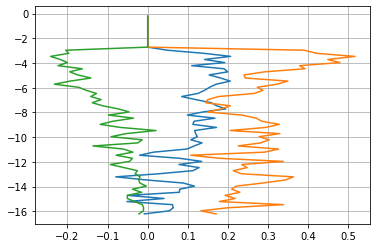

In [2]:
hf = h5py.File('ADCP_19_01_22_04.mat', 'r')
east_vel = hf['East_vel']
north_vel = hf['North_vel']
vertical_vel = hf['Vertical_vel']
z = hf['z_vec']

fig, ax = plt.subplots()
ax.plot(east_vel[1,:], z, label='East velocity [m/sec]')
ax.plot(north_vel[1,:], z, label='North velocity [m/sec]')
ax.plot(vertical_vel[1,:], z, label='Vertical velocity [m/sec]')
#plt.legend()

plt.grid(True)
plt.show()

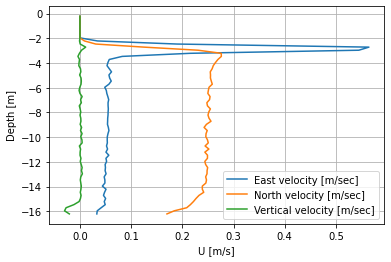

In [3]:
hf = h5py.File('ADCP_19_01_22_04.mat', 'r')
east_vel = np.array(hf['East_vel'])
north_vel = np.array(hf['North_vel'])
vertical_vel = np.array(hf['Vertical_vel'])
z = np.array(hf['z_vec'])
t = hf['time_vec']
hf.close()

time_start = 0*60 # sec
time_stop = 15*60 # sec
time_step = 1 #sec
start_i = int(time_start/time_step)
stop_i = int(time_stop/time_step)

east_vel_mean = np.mean(east_vel[start_i:stop_i], axis=0)
north_vel_mean = np.mean(north_vel[start_i:stop_i], axis=0)
vertical_vel_mean = np.mean(vertical_vel[start_i:stop_i], axis=0)

fig, ax = plt.subplots()
ax.plot(east_vel_mean, z, label='East velocity [m/sec]')
ax.plot(north_vel_mean, z, label='North velocity [m/sec]')
ax.plot(vertical_vel_mean, z, label='Vertical velocity [m/sec]')

plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.legend()
plt.grid(True)
plt.show()

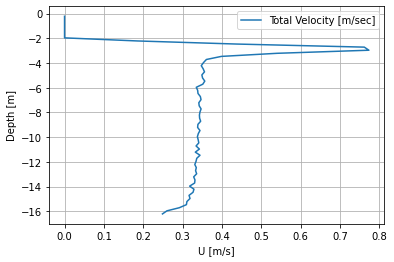

In [4]:
U = np.sqrt(north_vel_mean**2+east_vel_mean)
fig, ax = plt.subplots()
ax.plot(U, z, label='Total Velocity [m/sec]')
plt.legend()
plt.grid(True)
plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.show()

# 1) Mapping ADCP vs Radar Data Points

In [5]:
def distance(lat1, lon1, lat2, lon2):
    r = 6371 # km
    p = pi / 180

    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 2 * r * asin(sqrt(a))

In [6]:
radar_lat = 32.07833
radar_long = 34.47233

In [7]:
adcp_lat = 32.08048
adcp_long = 34.46277

In [8]:
distance(radar_lat, radar_long, adcp_lat, adcp_long)

0.9319006597343568

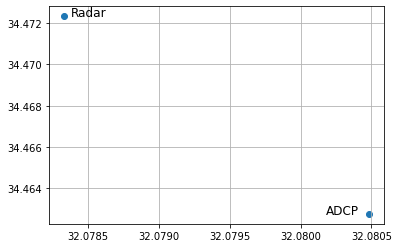

In [9]:
# Create scatter plot
plt.scatter(x=np.array([radar_lat, adcp_lat]), y=np.array([radar_long, adcp_long]))

# Label each point with an offset
plt.text(radar_lat +0.0003 , radar_long , 'Radar', fontsize=12, ha='right')
plt.text(adcp_lat - 0.00007, adcp_long , 'ADCP', fontsize=12, ha='right')

# Set grid
plt.grid(True)

# Show the plot
plt.show()

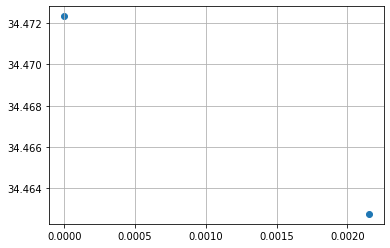

In [10]:
# Create scatter plot
plt.scatter(x=np.array([radar_lat - radar_lat, adcp_lat-radar_lat]), y=np.array([radar_long, adcp_long]))

# Label each point with an offset
#plt.text(radar_lat +0.0003 , radar_long , 'Radar', fontsize=12, ha='right')
#plt.text(adcp_lat - 0.00007, adcp_long , 'ADCP', fontsize=12, ha='right')

# Set grid
plt.grid(True)

# Show the plot
plt.show()

In [11]:
# Put the radar point on (0,0)

In [12]:
radar_0_lat = radar_lat - radar_lat
adcp_0_lat = adcp_lat - radar_lat

In [13]:
radar_0_long = radar_long - radar_long 
adcp_0_long = adcp_long - radar_long

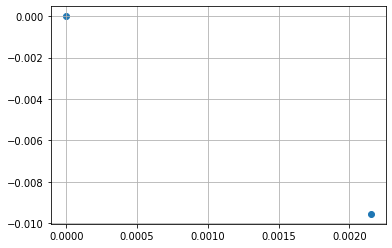

In [14]:
# Create scatter plot
plt.scatter(x=np.array([radar_0_lat, adcp_0_lat]), y=np.array([radar_0_long, adcp_0_long]))

# Label each point with an offset
#plt.text(radar_lat +0.0003 , radar_long , 'Radar', fontsize=12, ha='right')
#plt.text(adcp_lat - 0.00007, adcp_long , 'ADCP', fontsize=12, ha='right')

# Set grid
plt.grid(True)

# Show the plot
plt.show()

In [15]:
# Convert to km 

In [16]:
x = np.array([radar_lat, adcp_lat])
y = np.array([radar_long, adcp_long])
x_dist = x[1]-x[0]
y_dist = y[0]-y[1]

In [17]:
theta = np.arctan2(y_dist,x_dist)

In [18]:
km_distance = distance(radar_lat, radar_long, adcp_lat, adcp_long)

In [19]:
opp = km_distance*np.sin(theta)
opp

0.9091917380933765

In [20]:
adj = km_distance*np.cos(theta)
adj

0.20447303733273597

In [21]:
km_distance

0.9319006597343568

In [22]:
adcp_lat_m = adj * 1000
adcp_long_m = opp * 1000

In [23]:
sys.path.append("C:\\Users\josep\Desktop\PHYC40900_Project TP")
f = h5py.File('C:\\Users\josep\Desktop\PHYC40900_Project TP\Real Data Sets\First Tel-Aviv data', 'r')
x = f.get('x')
y = f.get('y')
t = f.get('t')
wamos = f.get('wamos')

x = np.array(x)
y = np.array(y)
t = np.array(t)
wamos = np.array(wamos)

In [24]:
def mean(x):
    return np.sum(x)/len(x)

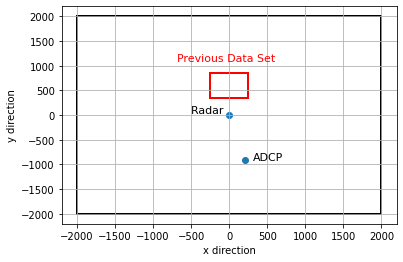

In [25]:
# Create scatter plot
plt.scatter(x=np.array([radar_0_lat, adcp_lat_m]), y=np.array([radar_0_long, -adcp_long_m]))

# Label each point with an offset
plt.text(radar_lat -55 , radar_long , 'Radar ', fontsize=11, ha='right')
plt.text(adcp_lat_m + 500, -adcp_long_m , 'ADCP', fontsize=11, ha='right')

plt.grid(True)

square_side = 4000
square_center = (0, 0)
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='black',  facecolor='none', lw = "2")
plt.gca().add_patch(square)

square_side = np.max(x) - x[0]
square_center = (mean(x), mean(y))
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='red',  facecolor='none', lw = "2")
plt.gca().add_patch(square)

plt.text(600 , 1100 , 'Previous Data Set', fontsize=11, ha='right', color ='red')


plt.xlabel("x direction")
plt.ylabel("y direction")
# Show the plot
plt.show()

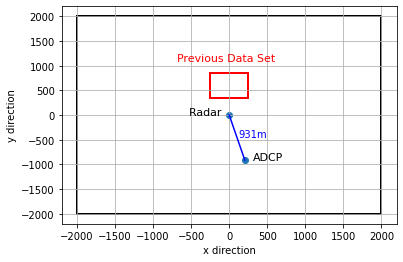

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Assuming you have radar_0_lat, radar_0_long, adcp_lat_m, adcp_long_m defined

# Create scatter plot
plt.scatter(x=np.array([radar_0_lat, adcp_lat_m]), y=np.array([radar_0_long, -adcp_long_m]))

# Label each point with an offset
plt.text(radar_0_lat - 55, radar_0_long, 'Radar ', fontsize=11, ha='right')
plt.text(adcp_lat_m + 500, -adcp_long_m, 'ADCP', fontsize=11, ha='right')

# Add a line between radar and ADCP
plt.plot([radar_0_lat, adcp_lat_m], [radar_0_long, -adcp_long_m], color='blue')

# Add label for the line
plt.text((radar_0_lat + adcp_lat_m) / 2+20, (radar_0_long - adcp_long_m) / 2, '931m', fontsize=10, color='blue')

plt.grid(True)

square_side = 4000
square_center = (0, 0)
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='black',  facecolor='none', lw="2")
plt.gca().add_patch(square)

# Assuming x and y are defined
square_side = np.max(x) - x[0]
square_center = (np.mean(x), np.mean(y))
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='red',  facecolor='none', lw="2")
plt.gca().add_patch(square)

plt.text(600, 1100, 'Previous Data Set', fontsize=11, ha='right', color='red')

plt.xlabel("x direction")
plt.ylabel("y direction")

# Show the plot
plt.show()


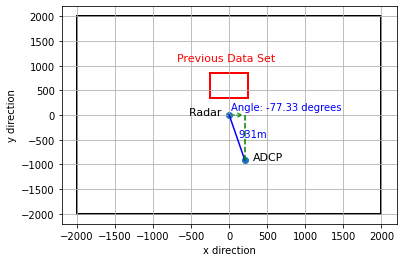

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Assuming you have radar_0_lat, radar_0_long, adcp_lat_m, adcp_long_m defined

# Create scatter plot
plt.scatter(x=np.array([radar_0_lat, adcp_lat_m]), y=np.array([radar_0_long, -adcp_long_m]))

# Label each point with an offset
plt.text(radar_0_lat - 55, radar_0_long, 'Radar ', fontsize=11, ha='right')
plt.text(adcp_lat_m + 500, -adcp_long_m, 'ADCP', fontsize=11, ha='right')

# Add a line between radar and ADCP
plt.plot([radar_0_lat, adcp_lat_m], [radar_0_long, -adcp_long_m], color='blue')

# Add label for the line
plt.text((radar_0_lat + adcp_lat_m) / 2 + 20, (radar_0_long - adcp_long_m) / 2, '931m', fontsize=10, color='blue')

# Calculate the angle in degrees
angle_rad = np.arctan2(-adcp_long_m - radar_0_long, adcp_lat_m - radar_0_lat)
angle_deg = np.degrees(angle_rad)

# Display the angle
plt.text(radar_0_lat + 20, radar_0_long + 100, f'Angle: {angle_deg:.2f} degrees', fontsize=10, color='blue')

# Add a vertical line from ADCP up to the line through the radar point
plt.plot([adcp_lat_m, adcp_lat_m], [0, -adcp_long_m], linestyle='--', color='green')

# Add an angle symbol
plt.annotate("", xy=(adcp_lat_m, 0), xytext=(radar_0_lat, radar_0_long),
             arrowprops=dict(arrowstyle="->", linestyle='--', color='green'))

plt.grid(True)

square_side = 4000
square_center = (0, 0)
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='black',  facecolor='none', lw="2")
plt.gca().add_patch(square)

# Assuming x and y are defined
square_side = np.max(x) - x[0]
square_center = (np.mean(x), np.mean(y))
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='red',  facecolor='none', lw="2")
plt.gca().add_patch(square)

plt.text(600, 1100, 'Previous Data Set', fontsize=11, ha='right', color='red')

plt.xlabel("x direction")
plt.ylabel("y direction")

# Show the plot
plt.show()


# 2) Comparison of Data

In [28]:
np.min(east_vel[start_i:stop_i], axis=0)

array([-0.7275645 , -0.6531519 , -0.52307343, -0.5399395 , -0.57830375,
       -0.50659895, -0.53312916, -0.5683676 , -0.60208106, -0.5734917 ,
       -0.57534236, -0.6116035 , -0.72134894, -0.6215041 , -0.6118934 ,
       -0.64464724, -0.622787  , -0.56316787, -0.6786153 , -0.6775521 ,
       -0.8108052 , -0.75052065, -0.8104326 , -0.8119468 , -0.9170202 ,
       -0.8909189 , -0.85812306, -0.8951973 , -0.9208828 , -0.96849495,
       -1.0894289 , -1.1164982 , -1.1768836 , -1.1298481 , -1.1616396 ,
       -1.2503443 , -1.3008751 , -1.3511829 , -1.3669752 , -1.3265848 ,
       -1.347569  , -1.4354113 , -1.408752  , -1.4687693 , -1.5710716 ,
       -1.6717857 , -1.7620285 , -1.869144  , -1.6900508 , -1.7731205 ,
       -1.7473847 , -1.4642019 , -1.2673812 , -0.97238773, -0.6236945 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
      dtype=float32)

In [29]:
np.max(east_vel[start_i:stop_i], axis=0)

array([0.659518  , 0.5381311 , 0.5299385 , 0.7412411 , 0.619594  ,
       0.5578446 , 0.64662653, 0.57297564, 0.6434871 , 0.68988174,
       0.7120161 , 0.7958058 , 0.74699706, 0.6892258 , 0.6586869 ,
       0.63403493, 0.67149895, 0.76710904, 0.7287491 , 0.6826985 ,
       0.7739818 , 0.73284364, 0.72580004, 0.7332256 , 0.7442327 ,
       0.7680681 , 0.7545365 , 0.8742584 , 0.86461675, 0.84589434,
       0.8734168 , 0.94569147, 0.97475916, 1.1016682 , 1.0173408 ,
       1.0425472 , 1.1687834 , 1.1777754 , 1.1934148 , 1.2157027 ,
       1.2873106 , 1.3329786 , 1.2789748 , 1.3829156 , 1.411933  ,
       1.4407734 , 1.5595173 , 1.6035916 , 1.6024034 , 1.7211622 ,
       1.7169883 , 1.7504215 , 1.7705914 , 1.8807609 , 2.1185517 ,
       2.7921867 , 3.0033448 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [30]:
np.std(east_vel[start_i:stop_i], axis=0)

array([0.19018304, 0.19270945, 0.1893016 , 0.19778454, 0.20005769,
       0.19464298, 0.20122251, 0.20135985, 0.20338538, 0.20460004,
       0.21163249, 0.2138583 , 0.2147727 , 0.21603523, 0.21922222,
       0.2230783 , 0.22415787, 0.22773957, 0.23175834, 0.23736595,
       0.24397036, 0.24678017, 0.25918686, 0.2642956 , 0.26741868,
       0.27744675, 0.28395453, 0.2862415 , 0.29450652, 0.30700493,
       0.31912747, 0.3308891 , 0.33728236, 0.341939  , 0.35347956,
       0.3728221 , 0.38344458, 0.39087728, 0.40234146, 0.41364703,
       0.42273405, 0.4360135 , 0.44921952, 0.47009426, 0.48640355,
       0.5008095 , 0.5194455 , 0.547754  , 0.5633946 , 0.57474166,
       0.5806141 , 0.58532315, 0.5745811 , 0.4839025 , 0.56593513,
       0.51629066, 0.29718366, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

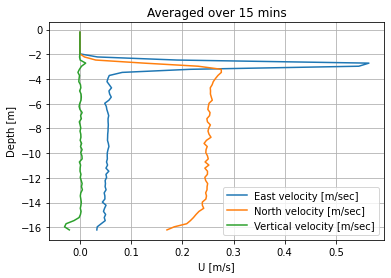

In [31]:
hf = h5py.File('ADCP_19_01_22_04.mat', 'r')
east_vel = np.array(hf['East_vel'])
north_vel = np.array(hf['North_vel'])
vertical_vel = np.array(hf['Vertical_vel'])
z = np.array(hf['z_vec'])
t = hf['time_vec']
hf.close()

time_start = 0*60 # sec
time_stop = 15*60 # sec
time_step = 1 #sec
start_i = int(time_start/time_step)
stop_i = int(time_stop/time_step)

east_vel_mean = np.mean(east_vel[start_i:stop_i], axis=0)
north_vel_mean = np.mean(north_vel[start_i:stop_i], axis=0)
vertical_vel_mean = np.mean(vertical_vel[start_i:stop_i], axis=0)

#std_deviation = np.std(east_vel[start_i:stop_i], axis=0)
#plt.errorbar(east_vel_mean, z[:,0], xerr=std_deviation, fmt='o', label='East velocity [m/sec]')


fig, ax = plt.subplots()
ax.plot(east_vel_mean, z, label='East velocity [m/sec]')
ax.plot(north_vel_mean, z, label='North velocity [m/sec]')
ax.plot(vertical_vel_mean, z, label='Vertical velocity [m/sec]')
plt.title("Averaged over 15 mins")

#ax.plot(np.max(east_vel[start_i:stop_i], axis=0), z, label='Maximum Ranges')
#ax.plot(np.min(east_vel[start_i:stop_i], axis=0), z, label='Minimum Ranges')

plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
data_edm = np.loadtxt('EDM_data.txt', skiprows=1)  # Skip the header row
data_pedm = np.loadtxt('PEDM_data.txt', skiprows=1)  # Skip the header row

In [33]:
U_EDM = data_edm[:,0]
z_EDM = data_edm[:,1]
U_PEDM = data_pedm[:,0]
z_PEDM = data_pedm[:,1]

(-20.0, 0.0)

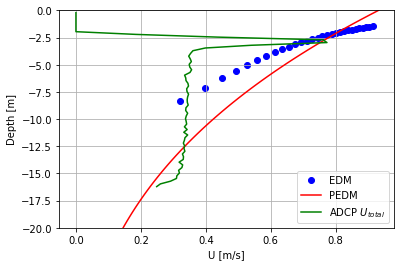

In [34]:
plt.scatter(U_EDM, z_EDM, label="EDM", color = 'blue')
plt.plot(U_PEDM, z_PEDM, label="PEDM", color = 'red')

U = np.sqrt(north_vel_mean**2+east_vel_mean)
plt.plot(U, z, label='ADCP $U_{total}$', color = 'green')

plt.grid(True)
plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.legend()

plt.ylim(-20,0)

## Closer Look at individual sd

In [35]:
np.mean( vertical_vel[start_i:stop_i][:,0] )

-0.020718405

In [36]:
vertical_vel[start_i:stop_i].shape

(360, 65)

In [37]:
vertical_vel[start_i:stop_i][:,0].shape

(360,)

In [38]:
east_vel_mean[0]

0.033002973

# 3) Angle of the current 

In [39]:
non_0 = (north_vel_mean != 0)

In [40]:
psi = np.arctan2(north_vel_mean[non_0], east_vel_mean[non_0])
psi

array([1.3790215 , 1.3893455 , 1.3743857 , 1.3458256 , 1.3597695 ,
       1.3529111 , 1.3756068 , 1.3743585 , 1.3608079 , 1.3892708 ,
       1.3750767 , 1.3761834 , 1.3803097 , 1.367948  , 1.3752245 ,
       1.3736255 , 1.3728989 , 1.3603787 , 1.3695487 , 1.3482262 ,
       1.365352  , 1.3597335 , 1.3614656 , 1.3603467 , 1.3599923 ,
       1.356581  , 1.351811  , 1.3469176 , 1.3457136 , 1.3564045 ,
       1.3625543 , 1.358866  , 1.35488   , 1.3554767 , 1.3564656 ,
       1.3534201 , 1.3527579 , 1.3523993 , 1.3596187 , 1.3635112 ,
       1.3683094 , 1.3807971 , 1.3552188 , 1.3368024 , 1.3469069 ,
       1.3520148 , 1.3331609 , 1.3523679 , 1.3704604 , 1.3671567 ,
       1.3614129 , 1.2802503 , 0.908222  , 0.40085006, 0.21833973,
       0.16111612, 0.25131348], dtype=float32)

Text(0, 0.5, 'Angle')

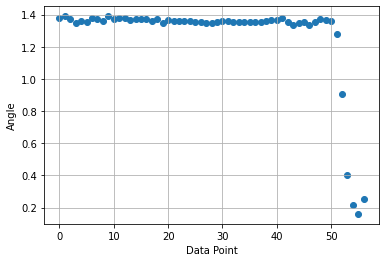

In [41]:
psi = np.arctan2(north_vel_mean[non_0], east_vel_mean[non_0])
no = np.arange(0, len(psi), 1)

plt.scatter(no , psi)
plt.grid(True)
plt.xlabel("Data Point")
plt.ylabel("Angle")

# 4) Vertical Velocity 

## 4.1) Vertical Velocity Gaussian

Text(0.5, 1.0, 'Vertical Velocity Histogram')

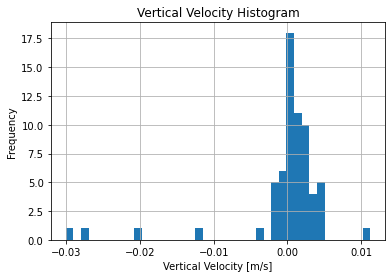

In [42]:
amplitudes_VU, amplitudesbins_VU, npatches_VU = plt.hist(vertical_vel_mean, bins=40, density=False)

plt.grid(True)
plt.xlabel("Vertical Velocity [m/s]")
plt.ylabel("Frequency")
plt.title("Vertical Velocity Histogram")

In [43]:
range_avg_VU = np.linspace(min(vertical_vel_mean), max(vertical_vel_mean), 40)
# Gives the average value of vertical velocity within each bin to help us fit a Gaussian Function to the data

In [44]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
# Defines the gaussian function with paramerters a, x0 and sigma

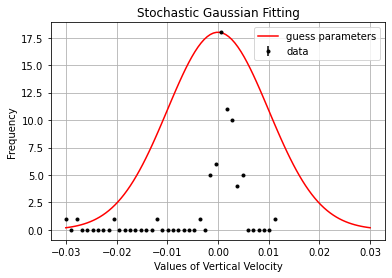

In [45]:
# plot the raw data
plt.errorbar(range_avg_VU, amplitudes_VU, yerr=0, fmt=".", color = 'black', label = 'data')
plt.grid(True)
plt.xlabel('Values of Vertical Velocity')
plt.ylabel('Frequency')


# initial guess
pars0 = (max(amplitudes_VU), 0,0.01)

# overlay gaussian
x = np.linspace(min(range_avg_VU), -min(range_avg_VU), 100)

plt.plot(x, gaus(x,*pars0), color = 'red', label = 'guess parameters')
plt.legend();
plt.title("Stochastic Gaussian Fitting");

## 4.2) Detection of Outliers

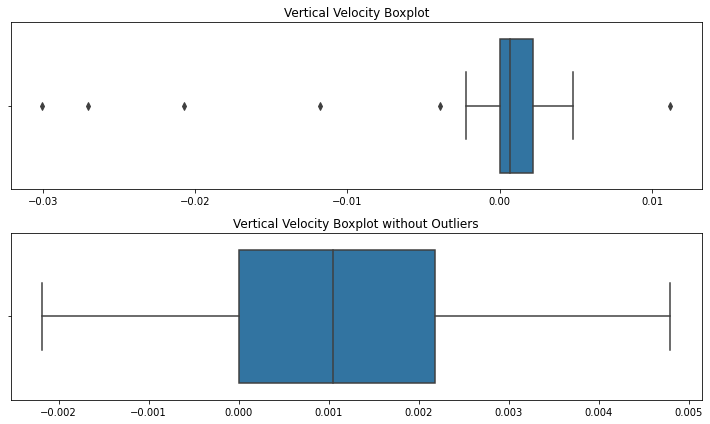

In [46]:
data = vertical_vel_mean

# first and third quartiles 
Q1 = np.percentile(data, 25 )
Q3 = np.percentile(data, 75)

# interquartile range
IQR = Q3 - Q1

# Lower and upper bounds identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify + remove outliers
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

plt.figure(figsize=(10, 6))

# Original data
plt.subplot(2, 1, 1)
sns.boxplot(x=data)
plt.title('Vertical Velocity Boxplot')

# Filtered data without outliers
plt.subplot(2, 1, 2)
sns.boxplot(x=filtered_data)
plt.title('Vertical Velocity Boxplot without Outliers')

plt.tight_layout()
plt.show()
